In [1]:
pip install moeximporter


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: /Users/vadimsmirnov/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from datetime import date
from moeximporter import MoexImporter, MoexSecurity, MoexCandlePeriods

/Users/vadimsmirnov/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
# Create an object to access ISS API requests
mi = MoexImporter()

# Get all traded securities
seclist = mi.getSecuritiesAllTraded()

# Get all traded bonds
seclist = mi.getBondsAllTraded()

# Get all traded shares
seclist = mi.getSharesAllTraded()

# Search for traded security
seclist = mi.searchForSecurityTraded('ОФЗ')


In [36]:
# Create an object to access sequirity data
sec = MoexSecurity('GAZP', mi)

# Print information about security
print(sec)

# Request quotes as a pandas DataFrame
quotes_df = sec.getHistoryQuotesAsDataFrame(date(2020, 1, 1), date(2023, 10, 20))

# Request quotes as an array of dicts
quotes_arr = sec.getHistoryQuotesAsArray(date(2020, 1, 1), date(2023, 10, 20))

# Request candles as a pandas DataFrame
candles_df = sec.getCandleQuotesAsDataFrame(date(2020, 1, 1), date(2023, 10, 20), interval=MoexCandlePeriods.Period1Hour)

# Request candles as an array of dicts
candles_arr = sec.getCandleQuotesAsArray(date(2020, 1, 1), date(2023, 10, 20), interval=MoexCandlePeriods.Period1Hour)


Security GAZP (ГАЗПРОМ ао)
Issued: 2006-01-23
Main board: TQBR (Т+: Акции и ДР - безадрес.)
Engine: stock
Market: shares
History for the main board is available from 2014-06-09 till 2023-10-27



In [37]:
prices = quotes_df[0:350]['VALUE'].array

quotes_df

,VALUE,OPEN,LOW,HIGH,WAPRICE,CLOSE,QUANTITY
TRADEDATE,,,,,,,
2020-06-22,6.909243e+09,195.35,192.62,195.35,193.77,193.90,35656930
2020-06-23,6.322523e+09,194.80,194.00,196.32,195.36,195.30,32361880
2020-06-25,8.933959e+09,191.72,190.55,192.48,191.42,190.59,46671550
2020-06-26,1.129464e+10,192.83,190.51,195.69,193.21,193.11,58458560
2020-06-29,8.374356e+09,192.64,192.58,197.64,194.90,197.64,42968650
...,...,...,...,...,...,...,...
2023-10-16,6.423835e+09,170.50,170.50,172.91,172.08,172.13,37330970
2023-10-17,3.872867e+09,172.75,171.50,173.30,172.09,172.00,22504000
2023-10-18,4.982489e+09,172.67,168.70,172.68,170.99,170.55,29136610


In [38]:
time = quotes_df[0:350].index.array

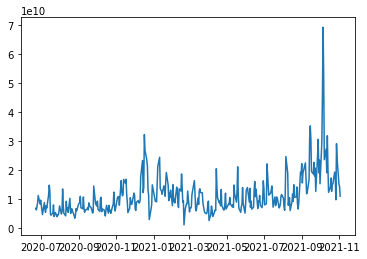

In [39]:
import matplotlib.pyplot as plt
plt.plot(time,prices)

,VALUE,OPEN,LOW,HIGH,WAPRICE,CLOSE,QUANTITY
TRADEDATE,,,,,,,
2023-05-02,5.291977e+09,181.00,175.80,181.86,178.92,178.50,29575240
2023-05-03,5.383886e+09,177.76,172.65,177.79,175.15,172.65,30738680
2023-05-04,3.206613e+09,173.23,172.01,174.24,173.11,172.55,18523750
2023-05-05,3.127152e+09,173.66,172.63,175.48,174.01,173.49,17971730
2023-05-08,1.656080e+09,172.60,170.65,172.91,171.25,171.50,9670440
...,...,...,...,...,...,...,...
2023-10-16,6.423835e+09,170.50,170.50,172.91,172.08,172.13,37330970
2023-10-17,3.872867e+09,172.75,171.50,173.30,172.09,172.00,22504000
2023-10-18,4.982489e+09,172.67,168.70,172.68,170.99,170.55,29136610
